In [4]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

from sklearn.datasets import load_diabetes

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Definition

In [5]:
_data = load_diabetes()
data = _data["data"]
feature_names = _data["feature_names"]

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data["target"]

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


# EDA

## Correlation

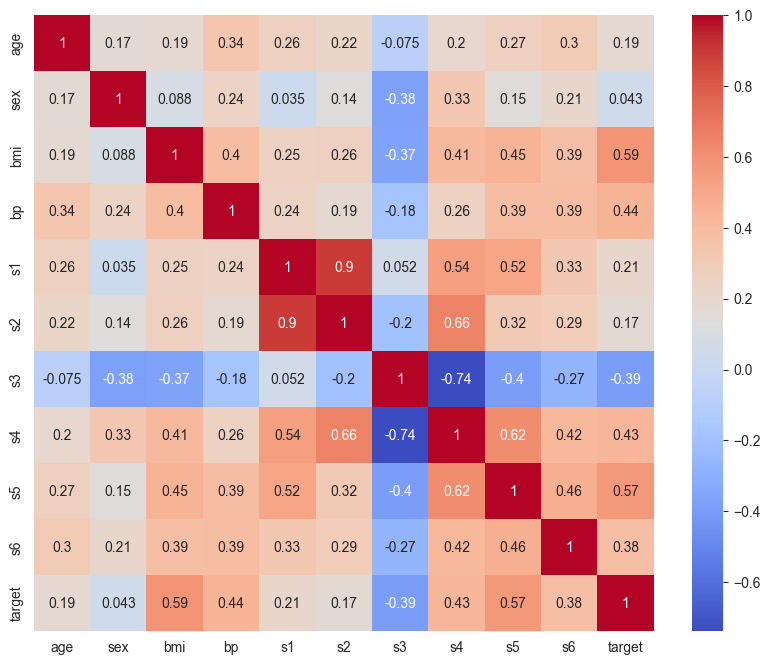

In [6]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data=df.corr(),
    annot=True,
    cmap="coolwarm",
)

plt.show()

# Machine Learning Regression

## Decision Tree

[Reference] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Dataset Definition

In [7]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [8]:
len(X_test)/len(X_train)

0.2521246458923513

### Model (Vanilla)

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
# Training 성능 (Regression : R^2)

model.score(X_train, y_train)

1.0

In [12]:
print(model.intercept_, model.coef_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'

#### Feature Importance

In [13]:
model.feature_importances_

array([0.06458641, 0.00667276, 0.41823226, 0.0624936 , 0.08317685,
       0.05338883, 0.063936  , 0.0297882 , 0.15579517, 0.06192992])

In [14]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
_feature_importances = pd.Series(
    model.feature_importances_,
    index=feature_names,
)

_feature_importances

age   0.0646
sex   0.0067
bmi   0.4182
bp    0.0625
s1    0.0832
s2    0.0534
s3    0.0639
s4    0.0298
s5    0.1558
s6    0.0619
dtype: float64

<Axes: >

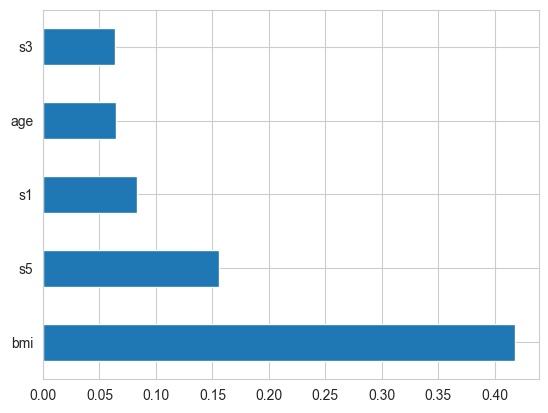

In [16]:
_feature_importances.nlargest().plot(kind="barh")

#### Prediction

Performance 
- `mean_squared_error` : MSE, 평균제곱오차 
- `root_mean_squared_error` : RMSE, 제곱근 평균 제곱 오차
- `mean_absolute_percentage_error` : MAPE, 평균 절대 퍼센트 오차
    - 예측값이 실제값에 대해 몇% 정도 오차가 나는지 해석
    - 0.45 : 실제값이 100이라면, 모델 예측값이 평균적으로 약 ±45 정도 편차가 발생한다 (상대적인 오차)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print(
    mean_squared_error(y_test, y_pred),
    root_mean_squared_error(y_test, y_pred),
    mean_absolute_percentage_error(y_test, y_pred),
)

4976.797752808989 70.54642267903446 0.45436569299881346


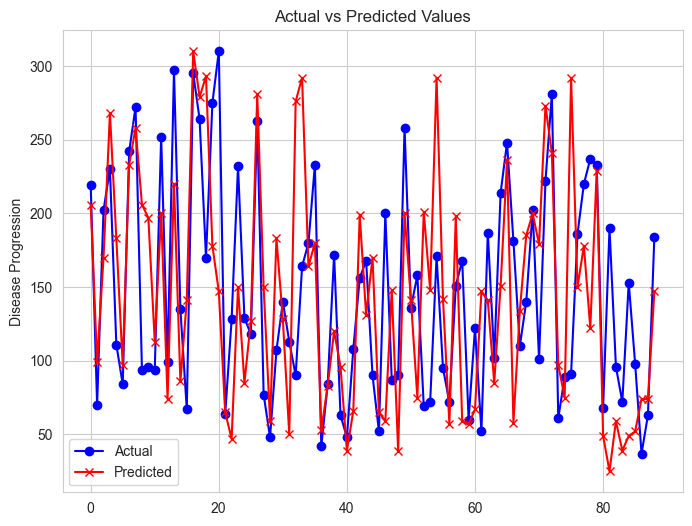

In [19]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', color='red')

plt.title('Actual vs Predicted Values')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

#### Tree Structure

In [20]:
from sklearn.tree import plot_tree

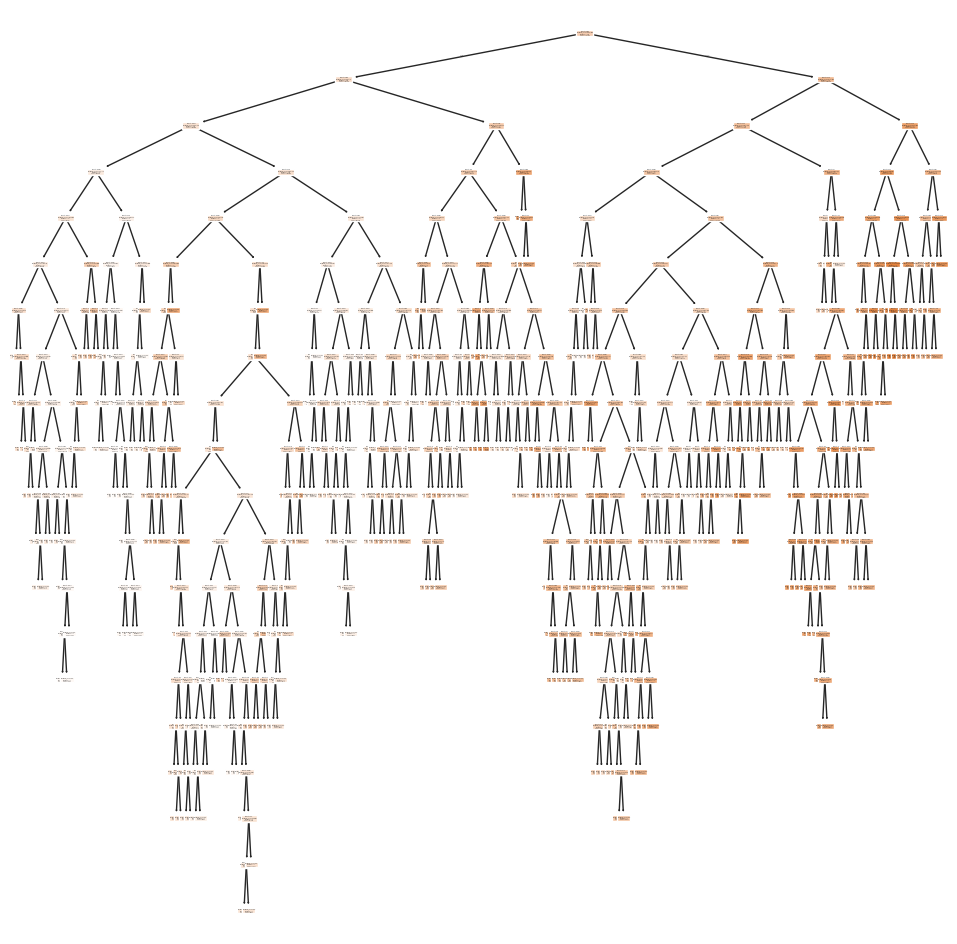

In [21]:
plt.figure(figsize=(12, 12))
plot_tree(model, filled=True)
plt.show()

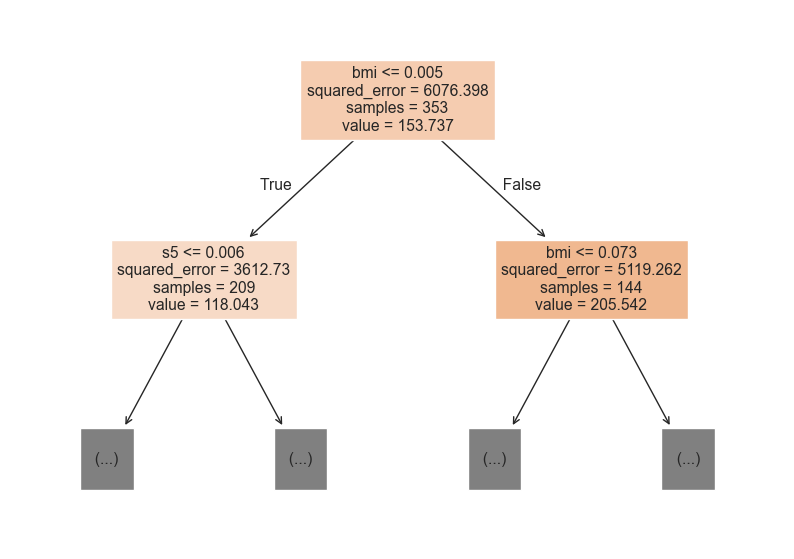

In [22]:
plt.figure(figsize=(10, 7))

plot_tree(
    model,
    filled=True,
    max_depth=1,
    feature_names=feature_names,
)

plt.show()

### Retraining (feat.Prunning)

In [23]:
model = DecisionTreeRegressor(
    max_depth=4,          # 트리의 최대 깊이 
    min_samples_split=10, # 노트 분할 시, 최소한 10개의 샘플이 있어야 함
    min_samples_leaf=5,   # 리프 노드에는 최소한 5개의 샘플리 있어야 함
    random_state=42,
)


In [24]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [25]:
model.score(X_train, y_train)

0.5749510560579061

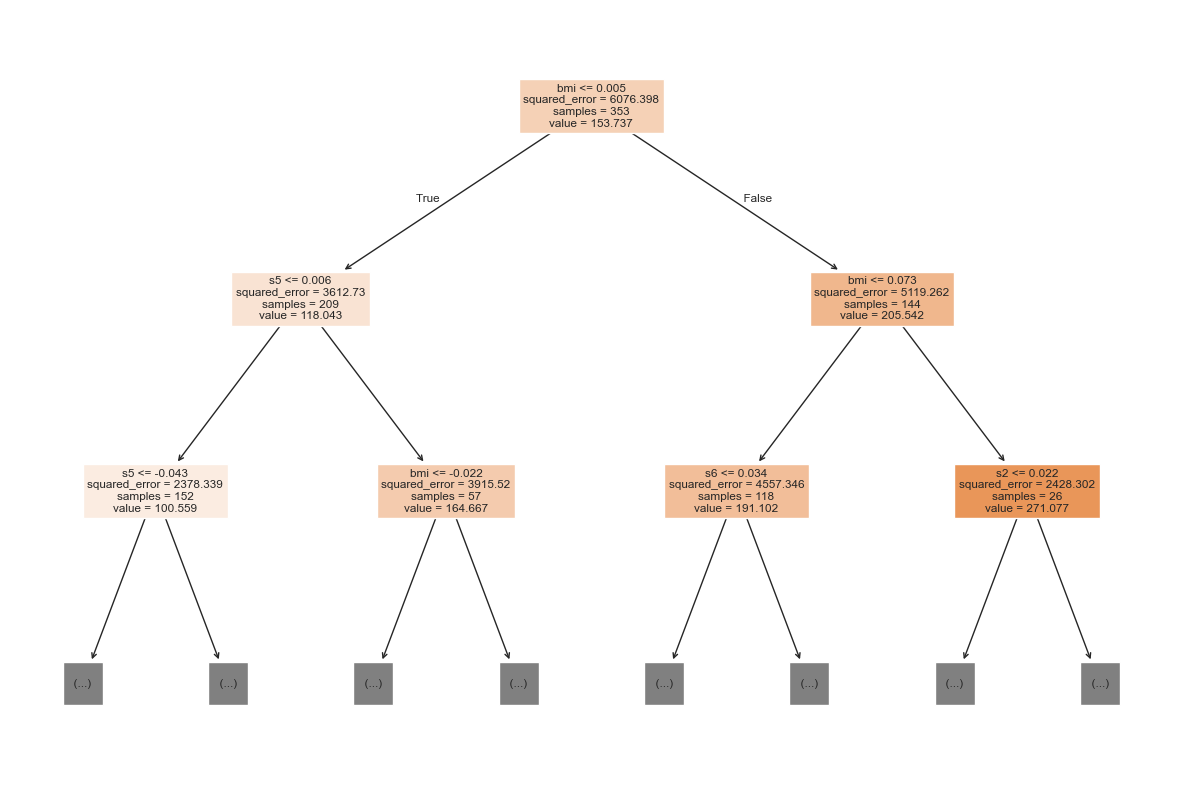

In [26]:
plt.figure(figsize=(15, 10))

plot_tree(
    model,
    filled=True,
    max_depth=2, # 시각화 위해 제한 
    feature_names=feature_names,
)

plt.show()

#### Feature Importance

In [27]:
model.feature_importances_

array([0.        , 0.        , 0.67362722, 0.01783673, 0.01019505,
       0.01925092, 0.01952965, 0.00390029, 0.19795503, 0.05770511])

In [28]:
_feature_importances = pd.Series(
    model.feature_importances_,
    index=feature_names,
)

_feature_importances

age   0.0000
sex   0.0000
bmi   0.6736
bp    0.0178
s1    0.0102
s2    0.0193
s3    0.0195
s4    0.0039
s5    0.1980
s6    0.0577
dtype: float64

<Axes: >

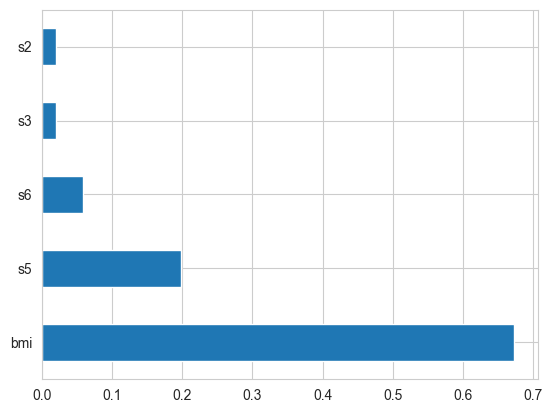

In [29]:
_feature_importances.nlargest().plot(kind="barh")

#### Prediction

In [30]:
y_pred = model.predict(X_test)

In [31]:
print(
    mean_squared_error(y_test, y_pred),
    root_mean_squared_error(y_test, y_pred),
    mean_absolute_percentage_error(y_test, y_pred),
)

2997.896424611375 54.753049454905934 0.3742180031800194


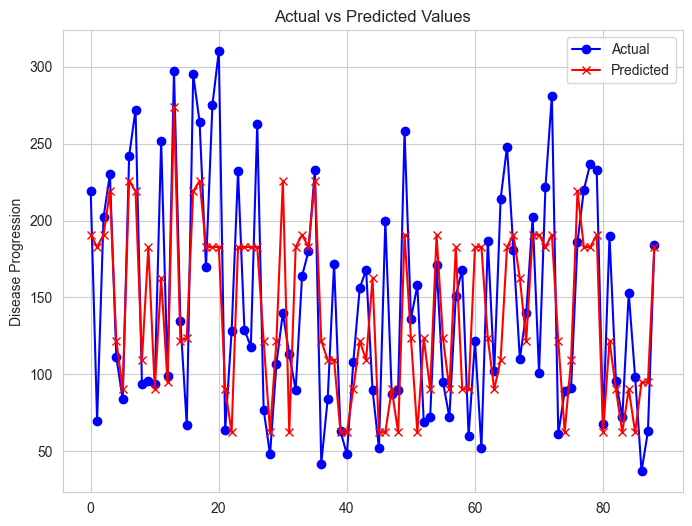

In [32]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', color='red')

plt.title('Actual vs Predicted Values')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

## 여러 알고리즘 결과 확인

(대상) Decision Tree, randomForest, Lasso, Ridge, XGB, LGBM

1. 위 알고리즘 중 가장 최적의 예측 성능을 보이는 알고리즘 확인 
    - Decision Tree는 위에서 Pruning 적용한 버전 적용
    - 현재 단계에서는 cross validation은 고려하지 않음  
2. 최적의 성능을 보이는 알고리즘의 feature importance 확인 
3. 최적의 모델에 대해서만 예측 성능 확인 (RMSE)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor 
## You are running 32-bit Python on a 64-bit OS
## (macOS) 32bit 오류 해결 -> brew install libomp 
from lightgbm import LGBMRegressor

In [34]:
random_state = 42

### 1. Models

In [47]:
models = {
    "DecisionTree (depth=4)": DecisionTreeRegressor(
        max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=random_state
    ),
    "DecisionTree (depth=6)": DecisionTreeRegressor(
        max_depth=6, min_samples_split=8, min_samples_leaf=4, random_state=random_state
    ),
    "RandomForest (100 trees)": RandomForestRegressor(
        n_estimators=100, max_depth=5, max_features="sqrt", random_state=random_state
    ),
    "RandomForest (200 trees)": RandomForestRegressor(
        n_estimators=200, max_depth=7, max_features="log2", random_state=random_state
    ),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1, random_state=random_state),
    "Lasso (alpha=0.01)": Lasso(alpha=0.01, random_state=random_state),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0, random_state=random_state),
    "Ridge (alpha=0.5)": Ridge(alpha=0.5, random_state=random_state),
    "XGB (lr=0.1, depth=3)": XGBRegressor(
        learning_rate=0.1, n_estimators=100, max_depth=3, random_state=random_state
    ),
    "XGB (lr=0.05, depth=5)": XGBRegressor(
        learning_rate=0.05, n_estimators=200, max_depth=5, random_state=random_state
    ),
    "LGBM (lr=0.1, leaves=31)": LGBMRegressor(
        learning_rate=0.1, num_leaves=31, feature_fraction=0.8, random_state=random_state
    ),
    "LGBM (lr=0.05, leaves=50)": LGBMRegressor(
        learning_rate=0.05, num_leaves=50, feature_fraction=0.9, random_state=random_state
    ),
}

In [48]:
results = {}

In [49]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

DecisionTree (depth=4) RMSE: 54.75
DecisionTree (depth=6) RMSE: 63.69
RandomForest (100 trees) RMSE: 53.12
RandomForest (200 trees) RMSE: 53.06
Lasso (alpha=0.1) RMSE: 52.90
Lasso (alpha=0.01) RMSE: 53.65
Ridge (alpha=1.0) RMSE: 55.47
Ridge (alpha=0.5) RMSE: 54.01
XGB (lr=0.1, depth=3) RMSE: 54.40
XGB (lr=0.05, depth=5) RMSE: 57.30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 153.736544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

### Best Model

In [52]:
# 가장 RMSE가 낮은 모델 찾기
best_model_name = min(results, key=results.get)
best_rmse = results[best_model_name]

print(f"최고 성능 모델: {best_model_name} (RMSE: {best_rmse:.2f})")

최고 성능 모델: Lasso (alpha=0.1) (RMSE: 52.90)


In [53]:
# 베스트 모델의 R^2 값 확인

best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_best_pred)

print(f"{best_model_name} R² Score: {r2:.4f}")

Lasso (alpha=0.1) R² Score: 0.4719


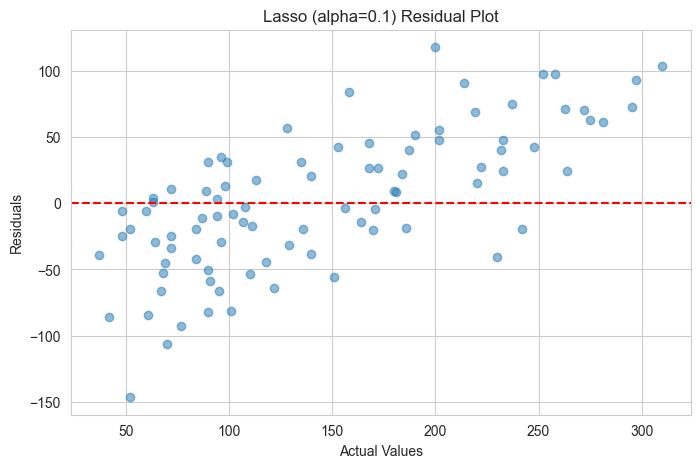

In [54]:
import matplotlib.pyplot as plt

residuals = y_test - y_best_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title(f"{best_model_name} Residual Plot")
plt.show()

### Feature Importance

In [46]:
## Tree 기반 : feature_importance 속성 활용

if hasattr(best_model, "feature_importances_"):
    feature_importance = best_model.feature_importances_
    features = X_train.columns  # 컬럼 이름 가져오기
    
    # 중요도 순으로 정렬
    sorted_idx = np.argsort(feature_importance)[::-1]
    
    # 시각화
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(features)), feature_importance[sorted_idx], align="center")
    plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()
    
    # 중요도 출력
    for idx in sorted_idx:
        print(f"{features[idx]}: {feature_importance[idx]:.4f}")

else:
    print(f"{best_model_name} 모델에서는 feature_importances_ 속성을 사용할 수 없습니다.")

Lasso 모델에서는 feature_importances_ 속성을 사용할 수 없습니다.


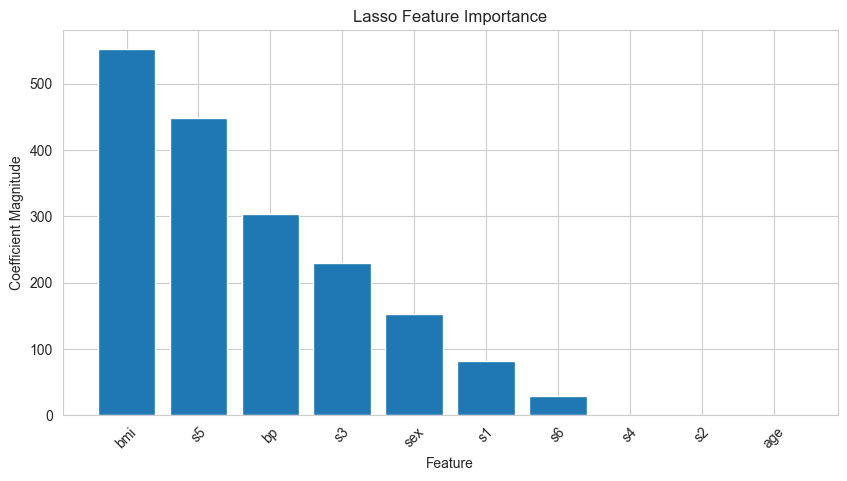

bmi: 552.6978
s5: 447.9195
bp: 303.3652
s3: -229.2558
sex: -152.6648
s1: -81.3650
s6: 29.6426
s4: 0.0000
s2: -0.0000
age: 0.0000


In [55]:
## Lasso, Ridge model : coef 속성 활용

lasso_coef = best_model.coef_

# 중요도 절댓값 기준으로 정렬
sorted_idx = np.argsort(np.abs(lasso_coef))[::-1]
features = X_train.columns  # 특성 이름 가져오기

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), np.abs(lasso_coef)[sorted_idx], align="center")
plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Lasso Feature Importance")
plt.show()

# 중요도 출력
for idx in sorted_idx:
    print(f"{features[idx]}: {lasso_coef[idx]:.4f}")

### Prediction

In [56]:
# 결과 출력
print("예측값 샘플:")
print(y_pred[:10])  # 처음 10개만 출력

예측값 샘플:
[149.90797479 176.54441877 153.89243944 270.25417021 127.79755166
 103.21619825 261.11261449 201.55904927  90.9619947  125.21354724]


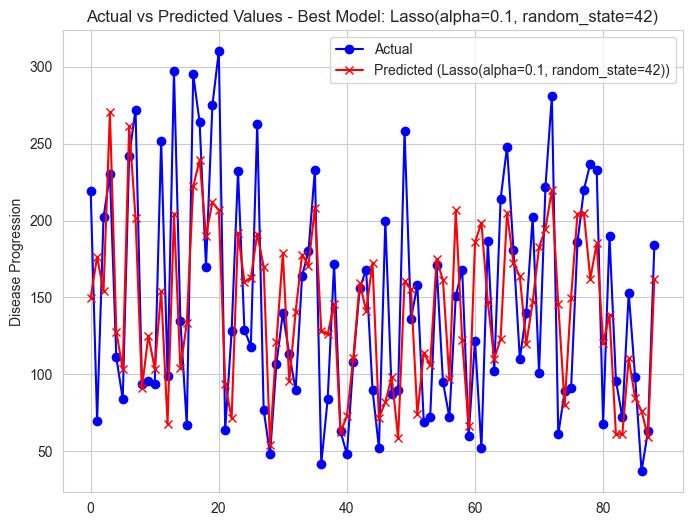

In [57]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label=f'Predicted ({best_model})', marker='x', color='red')

plt.title(f'Actual vs Predicted Values - Best Model: {best_model}')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

--------------------------
** End of Docuemtns **

# 추가 실습) 전처리 + 정규화 진행

In [65]:
# 이상치 탐지 함수 (IQR 방식)
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # IQR 범위를 벗어난 이상치 제거
    condition = ~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[condition]

# 예제: 전체 데이터에서 이상치 제거
df_cleaned = remove_outliers(df, df.columns)

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 정규화 (0~1 범위로 변환)
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [67]:
# 타겟 변수와 독립 변수 설정
X = df_normalized.drop(["target", "s1", "s3"], axis=1)
y = df_normalized["target"]

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
models = {
    "DecisionTree (depth=4)": DecisionTreeRegressor(
        max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=random_state
    ),
    "DecisionTree (depth=6)": DecisionTreeRegressor(
        max_depth=6, min_samples_split=8, min_samples_leaf=4, random_state=random_state
    ),
    "RandomForest (100 trees)": RandomForestRegressor(
        n_estimators=100, max_depth=5, max_features="sqrt", random_state=random_state
    ),
    "RandomForest (200 trees)": RandomForestRegressor(
        n_estimators=200, max_depth=7, max_features="log2", random_state=random_state
    ),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1, random_state=random_state),
    "Lasso (alpha=0.01)": Lasso(alpha=0.01, random_state=random_state),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0, random_state=random_state),
    "Ridge (alpha=0.5)": Ridge(alpha=0.5, random_state=random_state),
    "XGB (lr=0.1, depth=3)": XGBRegressor(
        learning_rate=0.1, n_estimators=100, max_depth=3, random_state=random_state
    ),
    "XGB (lr=0.05, depth=5)": XGBRegressor(
        learning_rate=0.05, n_estimators=200, max_depth=5, random_state=random_state
    ),
    "LGBM (lr=0.1, leaves=31)": LGBMRegressor(
        learning_rate=0.1, num_leaves=31, feature_fraction=0.8, random_state=random_state
    ),
    "LGBM (lr=0.05, leaves=50)": LGBMRegressor(
        learning_rate=0.05, num_leaves=50, feature_fraction=0.9, random_state=random_state
    ),
}

In [78]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

DecisionTree (depth=4) RMSE: 0.2026
DecisionTree (depth=6) RMSE: 0.2267
RandomForest (100 trees) RMSE: 0.1791
RandomForest (200 trees) RMSE: 0.1811
Lasso (alpha=0.1) RMSE: 0.2570
Lasso (alpha=0.01) RMSE: 0.1998
Ridge (alpha=1.0) RMSE: 0.1786
Ridge (alpha=0.5) RMSE: 0.1789
XGB (lr=0.1, depth=3) RMSE: 0.1839
XGB (lr=0.05, depth=5) RMSE: 0.1916
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] Start training from score 0.395608
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [79]:
# 가장 RMSE가 낮은 모델 찾기
best_model_name = min(results, key=results.get)
best_rmse = results[best_model_name]

print(f"최고 성능 모델: {best_model_name} (RMSE: {best_rmse:.2f})")

최고 성능 모델: Ridge (alpha=1.0) (RMSE: 0.18)


In [72]:
# 베스트 모델의 R^2 값 확인

best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_best_pred)

print(f"{best_model_name} R² Score: {r2:.4f}")

Ridge (alpha=1.0) R² Score: 0.5172


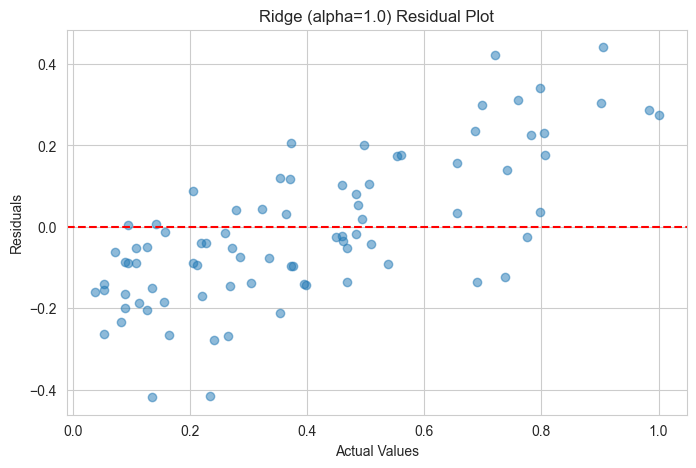

In [73]:
import matplotlib.pyplot as plt

residuals = y_test - y_best_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title(f"{best_model_name} Residual Plot")
plt.show()

In [74]:
## Tree 기반 : feature_importance 속성 활용

if hasattr(best_model, "feature_importances_"):
    feature_importance = best_model.feature_importances_
    features = X_train.columns  # 컬럼 이름 가져오기
    
    # 중요도 순으로 정렬
    sorted_idx = np.argsort(feature_importance)[::-1]
    
    # 시각화
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(features)), feature_importance[sorted_idx], align="center")
    plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()
    
    # 중요도 출력
    for idx in sorted_idx:
        print(f"{features[idx]}: {feature_importance[idx]:.4f}")

else:
    print(f"{best_model_name} 모델에서는 feature_importances_ 속성을 사용할 수 없습니다.")

Ridge (alpha=1.0) 모델에서는 feature_importances_ 속성을 사용할 수 없습니다.


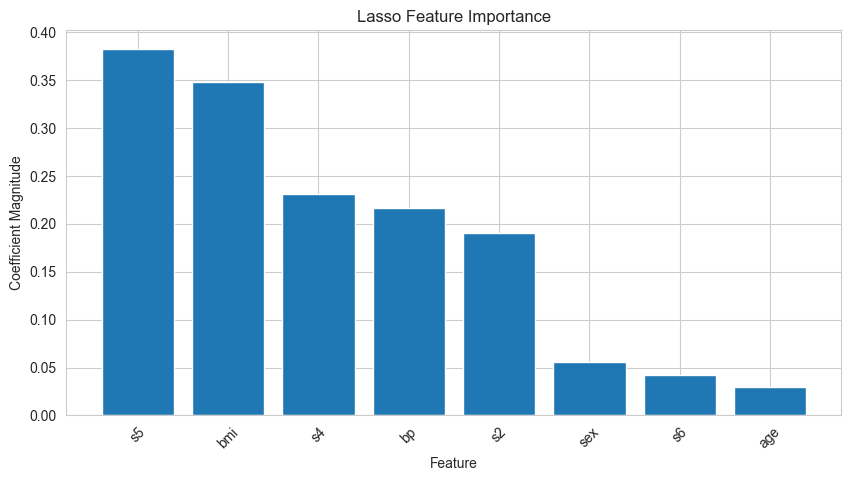

s5: 0.3830
bmi: 0.3480
s4: 0.2316
bp: 0.2165
s2: -0.1901
sex: -0.0557
s6: 0.0423
age: -0.0301


In [75]:
## Lasso, Ridge model : coef 속성 활용

lasso_coef = best_model.coef_

# 중요도 절댓값 기준으로 정렬
sorted_idx = np.argsort(np.abs(lasso_coef))[::-1]
features = X_train.columns  # 특성 이름 가져오기

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), np.abs(lasso_coef)[sorted_idx], align="center")
plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Lasso Feature Importance")
plt.show()

# 중요도 출력
for idx in sorted_idx:
    print(f"{features[idx]}: {lasso_coef[idx]:.4f}")

In [76]:
# 결과 출력
print("예측값 샘플:")
print(y_pred[:10])  # 처음 10개만 출력

예측값 샘플:
[0.34603881 0.21009852 0.33009121 0.77038797 0.53834633 0.1711402
 0.30330532 0.62259039 0.26589204 0.66676111]


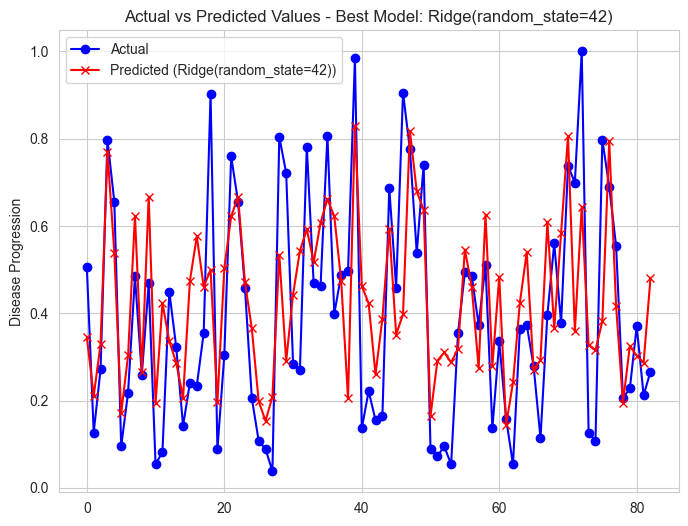

In [77]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label=f'Predicted ({best_model})', marker='x', color='red')

plt.title(f'Actual vs Predicted Values - Best Model: {best_model}')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()